# <font color="#008080">HW #2 Multivariable data processing: Applications of Singular Value Decomposition</font>

#### Profesor: EMILIO BAROCIO ESPEJO
#### Alumno: Ortega Camargo Fernando
#### GitHub Tarea2:
###### https://github.com/Fortega95/MEM_MCD/blob/main/Tarea4_Fernando_MEM.ipynb
Fecha: 13-02-24


##  <font color="#008080">Introducción</font>

La Descomposición en Valores Singulares (SVD) es una técnica fundamental en álgebra lineal y análisis de datos que descompone una matriz en tres componentes esenciales: una matriz de vectores singulares izquierdos, una matriz diagonal de valores singulares y una matriz de vectores singulares derechos. Este método se ha convertido en una herramienta esencial en diversas disciplinas, desde la ciencia de datos hasta el procesamiento de señales y la reducción de dimensionalidad.

En un contexto más amplio, SVD proporciona una representación compacta y eficiente de la información contenida en una matriz, permitiendo la identificación de patrones fundamentales y la extracción de características dominantes. Este enfoque ha demostrado su utilidad en la resolución de sistemas de ecuaciones lineales, la aproximación de matrices, la compresión de imágenes y la detección de estructuras subyacentes en conjuntos de datos multidimensionales.

El presente trabajo  explora la teoría detrás de la Descomposición en Valores Singulares mediante un ejemplo aplicado con el data set iris, con el fin de comprender los conceptos asi como mediante el apoyo de visualizaciones, comprender como est técnica comprime el espacio mediante una factorización matricial.

####  <font color="#008080">Descripción de la base</font>

El data set incluye informacion de una muestra de 150 flores "iris" segmentadas por especie y detallando las siguientes medidas númericas: Ancho del sepalo, Largo de sepalo, Ancho de petalo y longitud del petalo.  



Las columnas en este conjunto de datos son:

* Id
* Longitud del Sépalo (cm)
* Ancho del Sépalo (cm)
* Longitud del Pétalo (cm)
* Ancho del Pétalo (cm)
* Especie


Definiciones  
**Sepalo:** El sépalo es una parte de la flor que forma el cáliz, la capa externa del perianto. Funciona para proteger el botón floral y, en algunas plantas, participa en la polinización. Puede tener diferentes colores y formas, contribuyendo a la estética de la flor. Su función principal es proporcionar protección y soporte estructural.  
**Petalo:** Los pétalos son las partes coloridas de una flor que forman la corola. Tienen la función de atraer polinizadores con colores y fragancias, y también pueden ofrecer protección a las partes reproductoras de la flor durante su desarrollo.



#### 1. Download the dataset from https://www.kaggle.com/uciml/iris?select=Iris.csv

### Librerías necesarias

In [2]:
## importamos librerias
import os                                 #Liberia de manejo de sistema operativo

import pandas as pd                       #librerias de manejo ed arrays y dataframes
import numpy as np 
                                          # librerias de graficación
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")


sns.set()

#### cargamos data set

In [3]:
iris=pd.read_csv("D://Maestria//git//MEM_MCD//Bases//Iris.csv")

####  <font color="#008080">Análisis rápido de estructura</font>

In [3]:
iris.head(5)   #vemos primeros renglones de la base

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## datos generales de estructura

print(f"Dimension de la base iris: {iris.shape}")
print("###Columnas:")
print(list(iris.columns))

Dimension de la base iris: (150, 6)
###Columnas:
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [5]:
iris.info()   # informacion general de estructura, nulos, y tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.Id= iris.Id.astype("str")   # El id no representa un valor categorico ordinal, por lo que transformamos a STR para hacerlo categorico nominal

In [7]:
iris.describe(include="all")    #análisis estadístico rápido

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150,150.000000,150.000000,150.000000,150.000000,150
unique,150,NaN,NaN,NaN,NaN,3
top,1,NaN,NaN,NaN,NaN,Iris-setosa
freq,1,NaN,NaN,NaN,NaN,50
mean,NaN,5.843333,3.054000,3.758667,1.198667,NaN
std,NaN,0.828066,0.433594,1.764420,0.763161,NaN
min,NaN,4.300000,2.000000,1.000000,0.100000,NaN
25%,NaN,5.100000,2.800000,1.600000,0.300000,NaN
50%,NaN,5.800000,3.000000,4.350000,1.300000,NaN
75%,NaN,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
iris.Species.value_counts()   #validamos la cantidad de datos por categoría

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
iris.dtypes    #validamos el tipo de dato en python

Id                object
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### 2. Obtain scatter plot in 2D and 3D to display the dimensional reduction of the data

## Analisis de correlaciones

In [39]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
num_data = iris.iloc[:,1:5]   #tomamos la matriz numérica

In [15]:
num_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


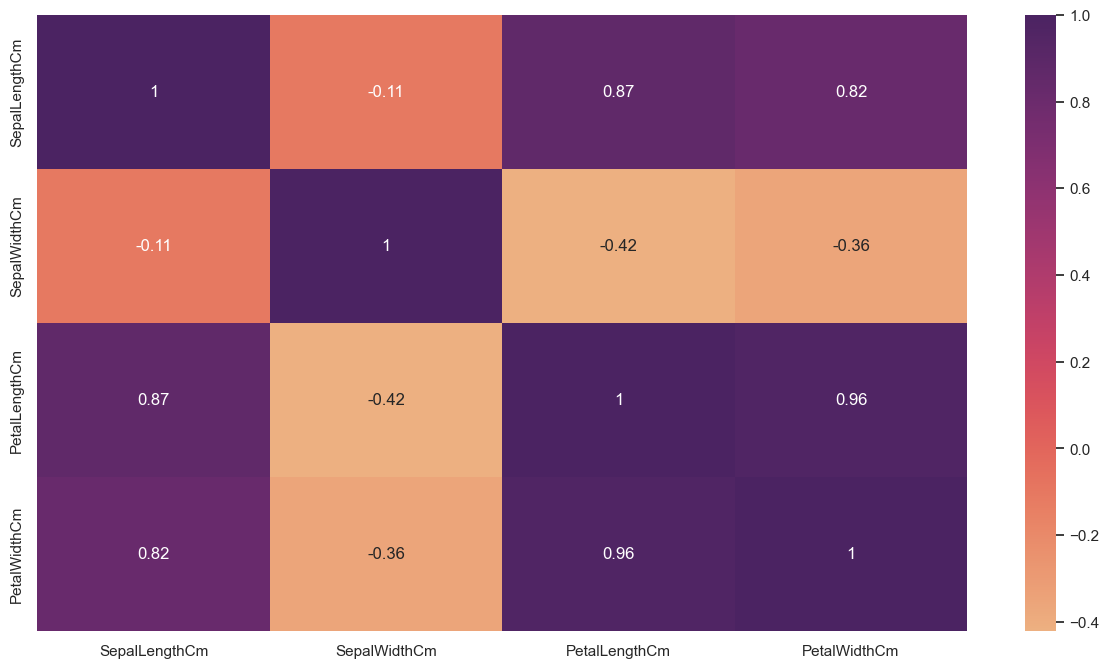

In [28]:
sns.set(rc={"figure.figsize":(15,8)})

sns.heatmap(num_data.corr(),annot=True, cmap="flare")
plt.show()

A partir del análisis anterior  podemos ver que hay fuertes correlaciones lineales entre algunas variables de nuestro data set, las principales son:
* Petal length vs Petal width  ( correlacion del 96%)
* Petal length vs Sepal length  ( correlacion del 87%)
* Petal width vs Sepal length  ( correlacion del 82%)

#### Corroboremos estas correlaciones con un Scatter plot

<Figure size 4000x1000 with 0 Axes>

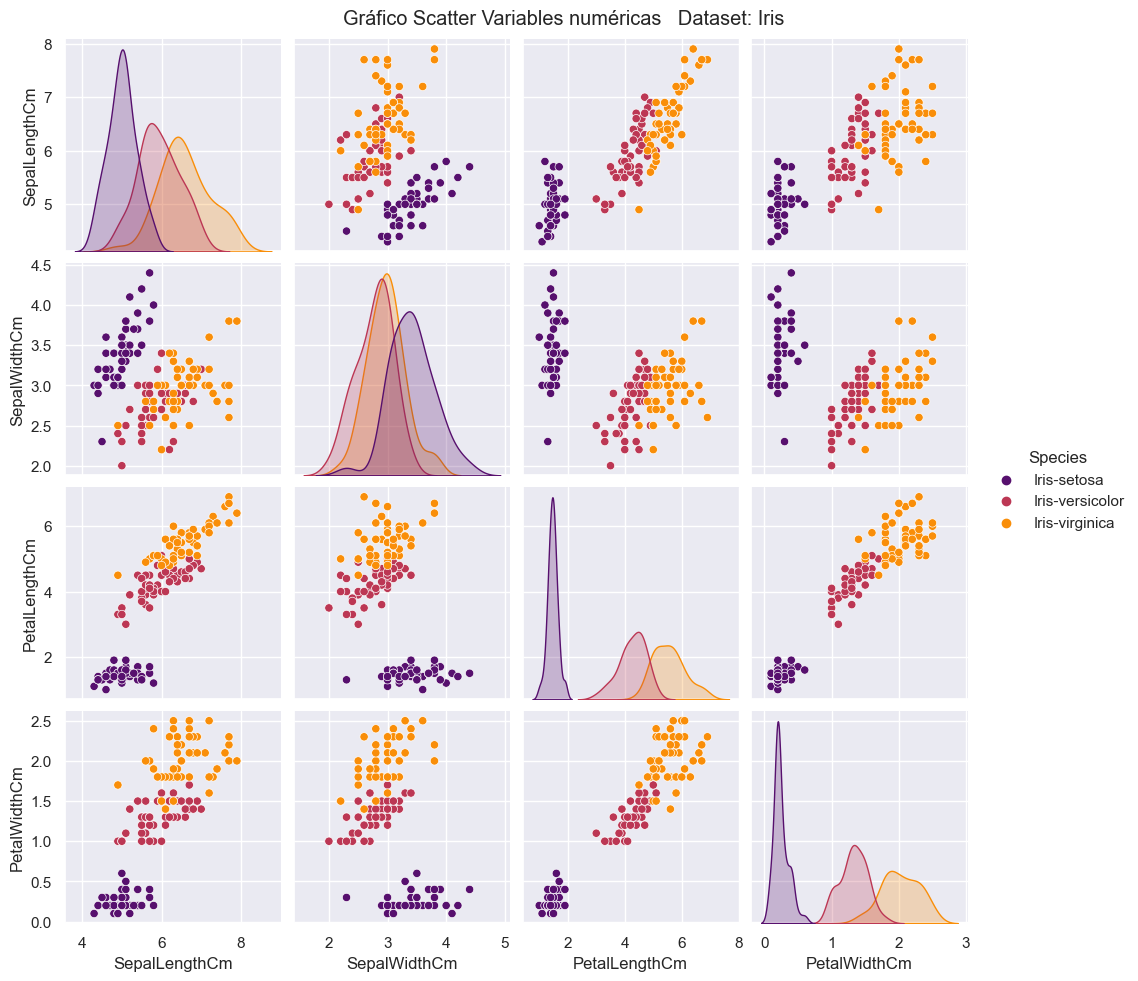

In [10]:
plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(iris,hue='Species',palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter Variables numéricas   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

En efecto podemos corroborar la info de la tabla de correlación  
* Petal length vs Petal width  ( correlacion del 96%)
* Petal length vs Sepal length  ( correlacion del 87%)
* Petal width vs Sepal length  ( correlacion del 82%)  

A partir de aquí vemos en el scatter dicha tendencia mediante patrones lineales, de igual forma vemos como los conjuntos son separables al tener para esos datos correlacionados grupos claramente definidos

________________________

#### 3. Compute the error between the original data and its reduced model data
#### 4. Compressed the original data and provided a metric to assess the data compression.

## Aplicamos singular value descomposition  SVD a nuestros datos para comprimir la información

Usamos la libreria svd del módulo linalg de numpy, como input nos pide una matriz, la cual regresará con 3 salidas que representan la descomposición. Una matriz U ortogonal, un matriz diagonal S con los eigenvalores, y una matriz V con los eigenvectores

In [6]:
U,S,VT = np.linalg.svd(num_data,full_matrices=False)

S=np.diag(S)

Vemos nuestra matriz de eigenvalores para ver la distribución de información

In [31]:
pd.DataFrame(S)

,0,1,2,3
0,95.950668,0.000000,0.000000,0.000000
1,0.000000,17.722953,0.000000,0.000000
2,0.000000,0.000000,3.469297,0.000000
3,0.000000,0.000000,0.000000,1.878912


Grafiquemos la aportación de información para ver el factor optimo de compresión 

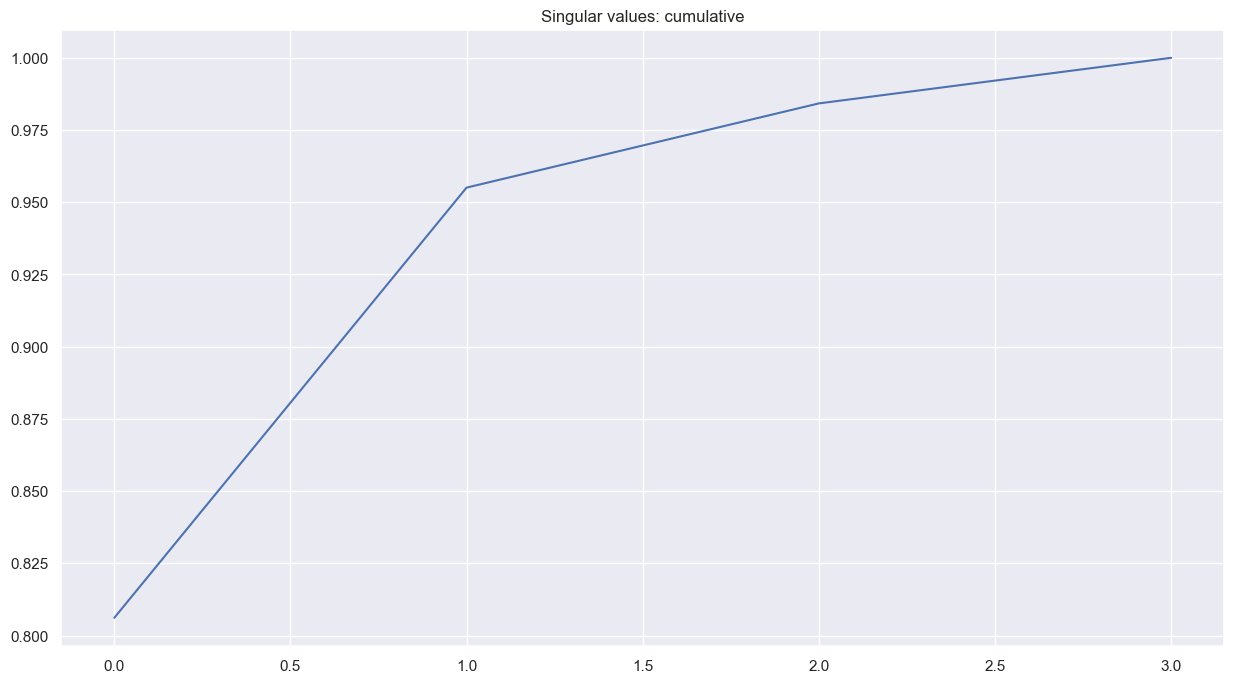

In [32]:
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Singular values: cumulative")
plt.show()


Este gráfico nos da la noción del % de información que resume cada eigenvalor acumulado, como podemos observar con 1 eigenvalor explicamos alrededor de el 82% de los datos, lo que nos da indicio en efecto de la suposición anterior de que hay muchas dimensiones linealmente dependientes en este data set, para nuestros fines computacionales vemos que con 2 eigenvalores ya explicamos arriba del 95% por lo que esta sería una buena aproximación con una compresión del 50%

# r=1

Probamos con r = 1, es decir usaremos un solo eigenvalor así como su eigenvector asociado

In [33]:
r=1  


In [34]:
Xapprox= U[:,:r] @ S[0:r,:r]@VT[:r,:]   #parametrizamos para tomar los valores asociados a r en la descompisición

Gráfiquemos los scatters para esta descomposición de tamaño 1

<Figure size 4000x1000 with 0 Axes>

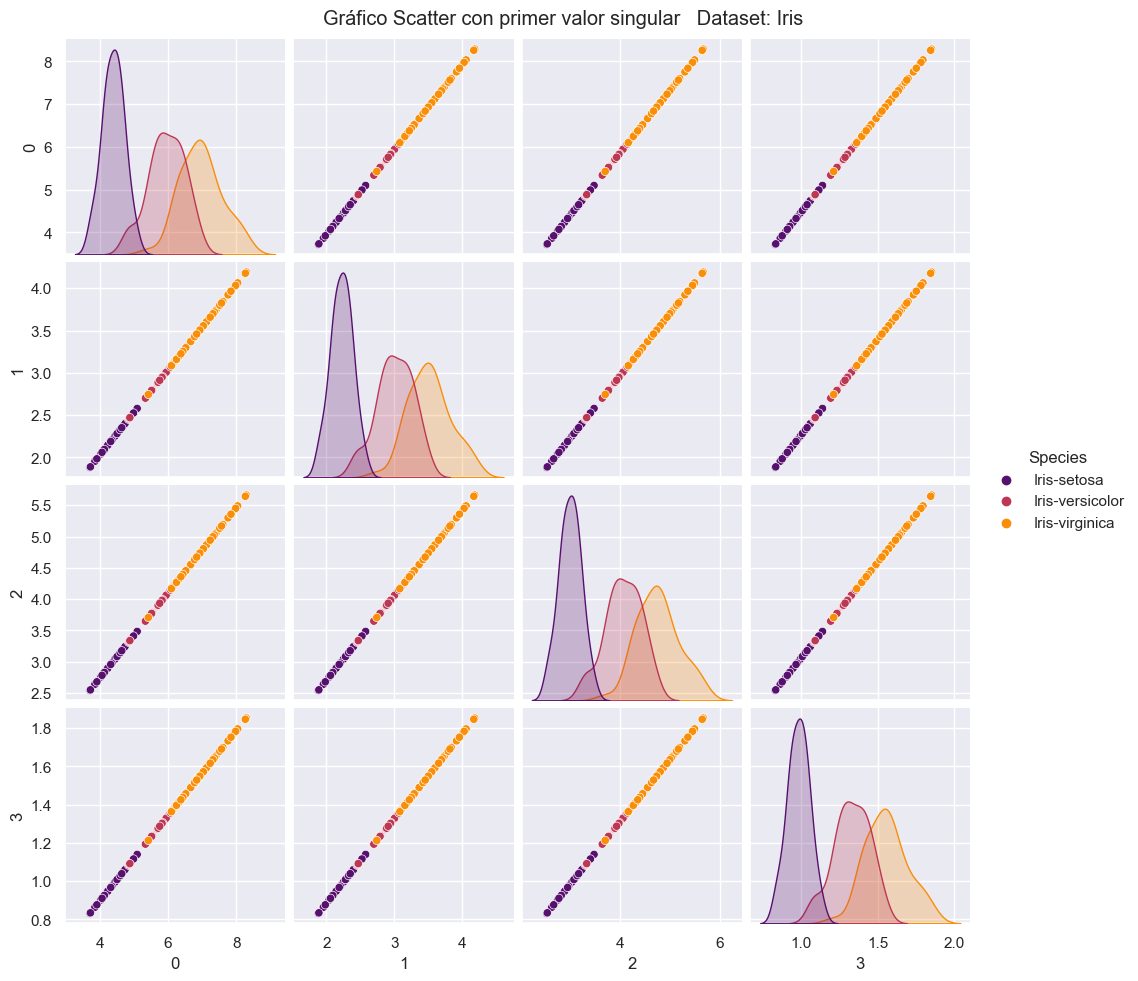

In [35]:
plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(pd.concat([pd.DataFrame(Xapprox),iris.Species],axis=1),hue="Species",palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter con primer valor singular   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

Esta dimensión es la más importante pues es la que esta asociada al eigenvalor máximo, esto lo vemos claramente en la división de grupos y como esta dimensión nos da una idea de la varianza de los datos, las tendencias generales asi como esta partición de grupos. Como sólo estamos tomando un eigenvalor, este nos esta explicando únicamente los factores asociados al eigenvector que representa la linea en el gráfico

# Error y CO para r = 1

#### Compression Ratio

El "Compression Ratio" (CR) en un problema de descomposición en valores singulares se refiere a la relación entre la cantidad de información retenida después de la compresión y la cantidad de información original. Se calcula  a partir de la siguiente fórmula:  

$CO =\frac{Número de singularidades retenidas}{Número total de singularidades en la matriz original} $ 

In [36]:
# en nuestro Caso con R = 1 tenemos que el total de singularidades esta dado por s

CO = r / len(np.diag(S))

print(f" el compression Ratio para r = 1 es : {CO}")

 el compression Ratio para r = 1 es : 0.25


#### MAPE

El Mean Absolute Percent Error (MAPE) es una medida que se utiliza  para evaluar la precisión de un modelo en relación con los valores reales. En el contexto de la descomposición en valores singulares (SVD), se usa el MAPE para comparar la matriz original con la matriz reconstruida utilizando un número específico de singularidades retenidas.

In [39]:
absolute_percentage_errors = np.abs((np.array(num_data) - np.array(Xapprox)) / np.array(num_data))

mape_value = np.mean(absolute_percentage_errors) * 100

print(f" el MAPE para r = 1 es : {np.round(mape_value,2)}")

 el MAPE para r = 1 es : 51.39


Como vemos en los resultados para un r = 1, estamos usando un factor de copresion del .25, es decir, estamos comprimiendo nuestros datos al .25 del total.
De igual forma vemos un error grande respecto a la matriz original de 51 unidades

# r=2

Probamos con r = 2, es decir usaremos dos eigenvalores asi como sus dos eigenvectores asociados

In [7]:
r=2
Xapprox= U[:,:r] @ S[0:r,:r]@VT[:r,:]


<Figure size 4000x1000 with 0 Axes>

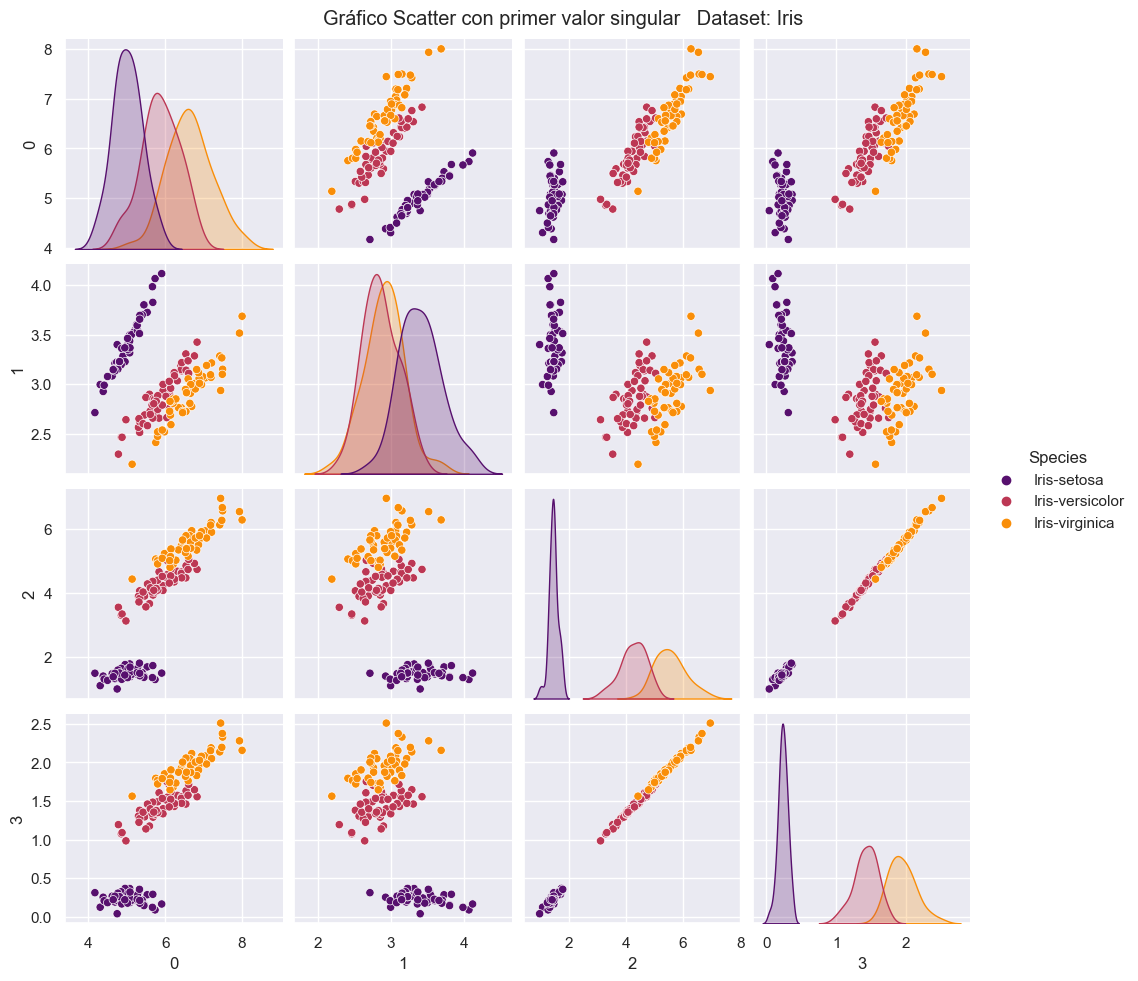

In [41]:

plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(pd.concat([pd.DataFrame(Xapprox),iris.Species],axis=1),hue="Species",palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter con primer valor singular   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

Esta combinación de dimensiones es la que vimos nos resume el 95% de nuestros datos, por lo que con ellas podemos practicamente definir el espacio completo, esto lo vemos con la similitud entre los datos originales y estae scatter, conservando tendencias, patroes y grupos, así como la amplitud de varianza en dos direcciones, en este caso ortogonales.

# Error y CO para r = 2

In [8]:
# en nuestro Caso con R = 2 tenemos que el total de singularidades esta dado por s
r=2
CO = r / len(np.diag(S))

print(f" el compression Ratio para r = 2 es : {CO}")

 el compression Ratio para r = 2 es : 0.5


In [9]:
absolute_percentage_errors = np.abs((np.array(num_data) - np.array(Xapprox)) / np.array(num_data))

mape_value = np.mean(absolute_percentage_errors) * 100

print(f" el MAPE para r = 2 es : {np.round(mape_value,2)}")

 el MAPE para r = 2 es : 7.41


# r= 3

Probamos con r = 3, es decir, tomaremos 3 eigenvalores asi como 3 eigenvectores

In [99]:
r=3
Xapprox= U[:,:r] @ S[0:r,:r]@VT[:r,:]

<Figure size 4000x1000 with 0 Axes>

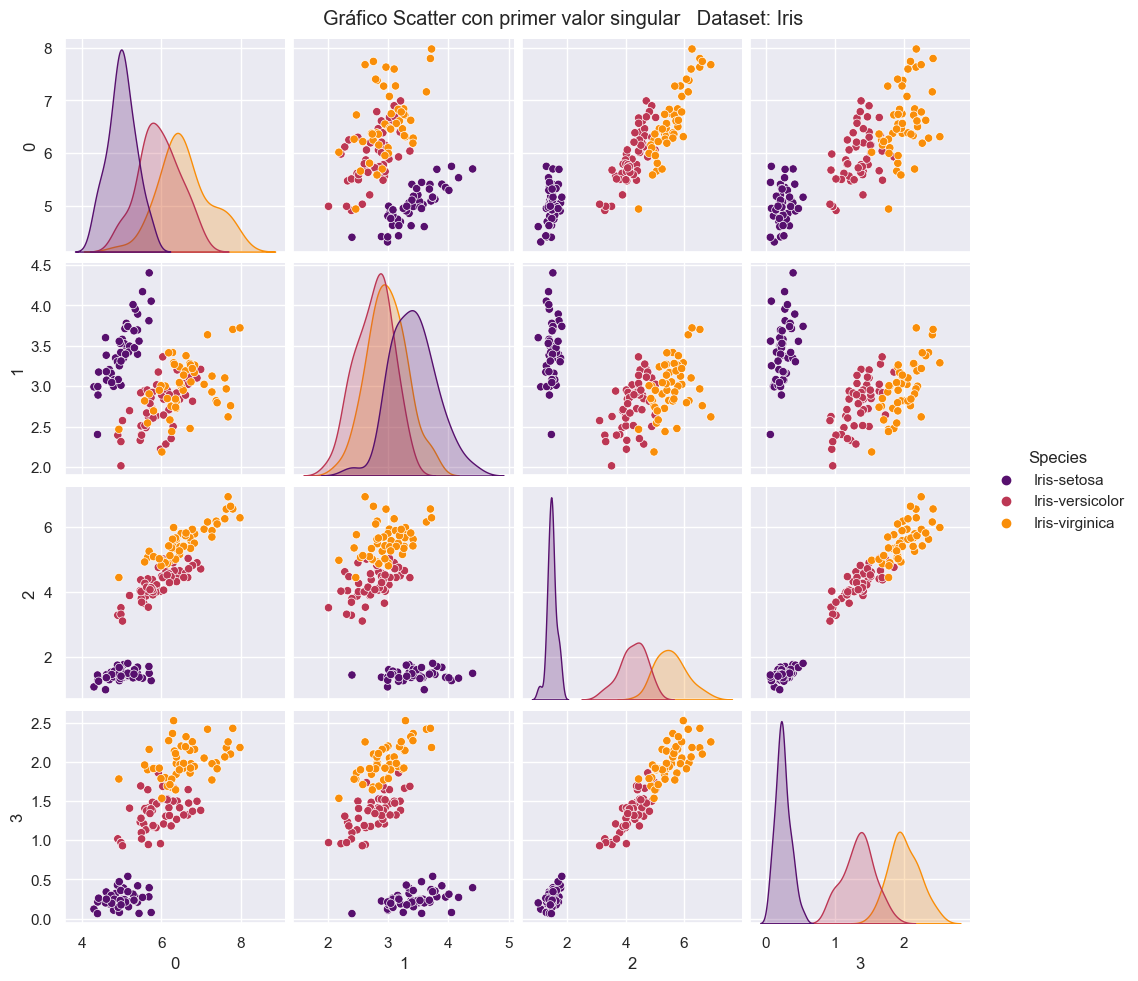

In [50]:


plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(pd.concat([pd.DataFrame(Xapprox),iris.Species],axis=1),hue="Species",palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter con primer valor singular   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

Esta combinación de dimensiones es la que vimos nos resume el 97% de nuestros datos, por lo que con 3 componentes tenemos  en terminos estadísticos toda la variabilidad del espacio ( con un error menor al 5%), esto lo vemos con la similitud entre los datos originales y este scatter, conservando tendencias, patroes y grupos, así como la amplitud de varianza en tres direcciones, en este caso ortogonales.
Esta reduccion disminuye considerablemente el espacio, y nos da un buen desempeño computacional a la hora de usar la información resumida

### Grafico 3d  ( principales componentes de svd)

Graficaremos las 3 primeras componentes asi como loas 3 columas iniciales de nuestros datos para ver si en efecto con estas podemos representar casi la totalidad de los mismos

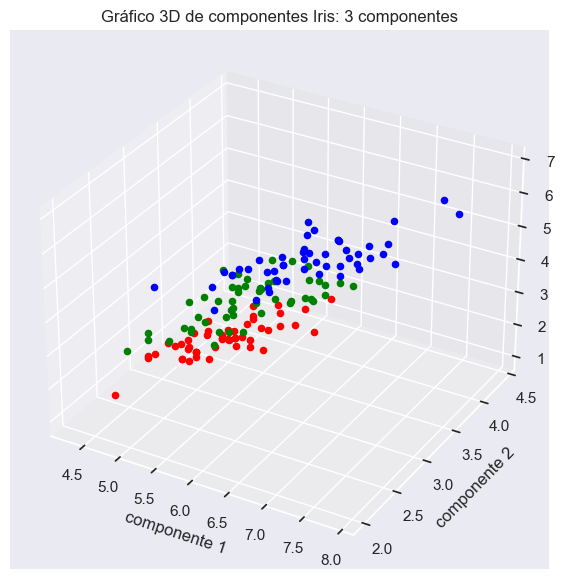

In [93]:
# Grafico scatter de las 3 primeras componentes

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


for i in range(len(iris.Species)):
    if iris.Species[i]=="Iris-setosa":
        ax.scatter(Xapprox[i, 0], Xapprox[i, 1], Xapprox[i, 2], c="red", marker='o')
    elif iris.Species[i]=="Iris-versicolor":
        ax.scatter(Xapprox[i, 0], Xapprox[i, 1], Xapprox[i, 2], c="green", marker='o')
    else:
        ax.scatter(Xapprox[i, 0], Xapprox[i, 1], Xapprox[i, 2], c="blue", marker='o')

# Etiquetas 
ax.set_xlabel('componente 1')
ax.set_ylabel('componente 2')
ax.set_zlabel('componente 3')

# Título 
ax.set_title('Gráfico 3D de componentes Iris: 3 componentes')

# Mostrar el gráfico
plt.show()

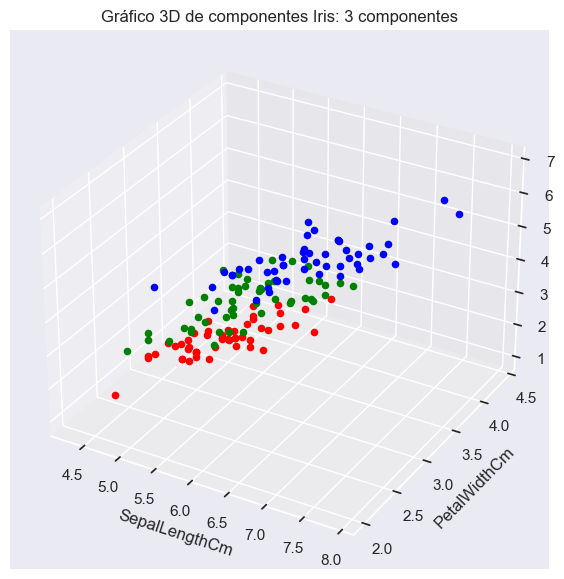

In [97]:
# Grafico scatter de las 3 primeras columnas

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


for i in range(len(iris.Species)):
    if iris.Species[i]=="Iris-setosa":
        ax.scatter(iris.SepalLengthCm[i],iris.SepalWidthCm[i],iris.PetalLengthCm[i], c="red", marker='o')
    elif iris.Species[i]=="Iris-versicolor":
         ax.scatter(iris.SepalLengthCm[i],iris.SepalWidthCm[i],iris.PetalLengthCm[i], c="green", marker='o')
    else:
         ax.scatter(iris.SepalLengthCm[i],iris.SepalWidthCm[i],iris.PetalLengthCm[i], c="blue", marker='o')

# Etiquetas 
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('PetalLengthCm')

# Título 
ax.set_title('Gráfico 3D de componentes Iris: 3 componentes')

# Mostrar el gráfico
plt.show()

Comparando los gráficos vemos que en efecto practicamente son los mismos , nos distingue perfectamente la varianza, escalas, grupos así como los datos atípicos, con esto podemos comprobar que los primeros 3 componentes son una aproximación prácticamente exacta de la matriz original

# Error y CO para r = 3

In [102]:
# en nuestro Caso con R = 3 tenemos que el total de singularidades esta dado por s
r=3
CO = r / len(np.diag(S))

print(f" el compression Ratio para r = 3 es : {CO}")

 el compression Ratio para r = 3 es : 0.75


In [101]:
absolute_percentage_errors = np.abs((np.array(num_data) - np.array(Xapprox)) / np.array(num_data))

mape_value = np.mean(absolute_percentage_errors) * 100

print(f" el MAPE para r = 3 es : {np.round(mape_value,2)}")

 el MAPE para r = 3 es : 4.48


Los cálculos anteriores nos indican que estamos comprimiendo nuestros datos a un 75 % , con respecto a los valores singulares o rango de la matriz, lo que nos indica que la data esta siendo comprimida una dimensión menos de la original, es decir, esta tomando solo 3 vectores propios. De igual forma vemos la disminución considerable del error, pasando con un componente de 51 a 4 con r = 3

# r = 4

Probamos con r = 3, es decir, tomaremos 4 eigenvalores asi como 4 eigenvectores.
En pocas palabras estamos tomando la totalidad de nuetra información

In [104]:
r=4
Xapprox= U[:,:r] @ S[0:r,:r]@VT[:r,:]

Visualizamos los scatter numericos para estas 4 componentes


<Figure size 4000x1000 with 0 Axes>

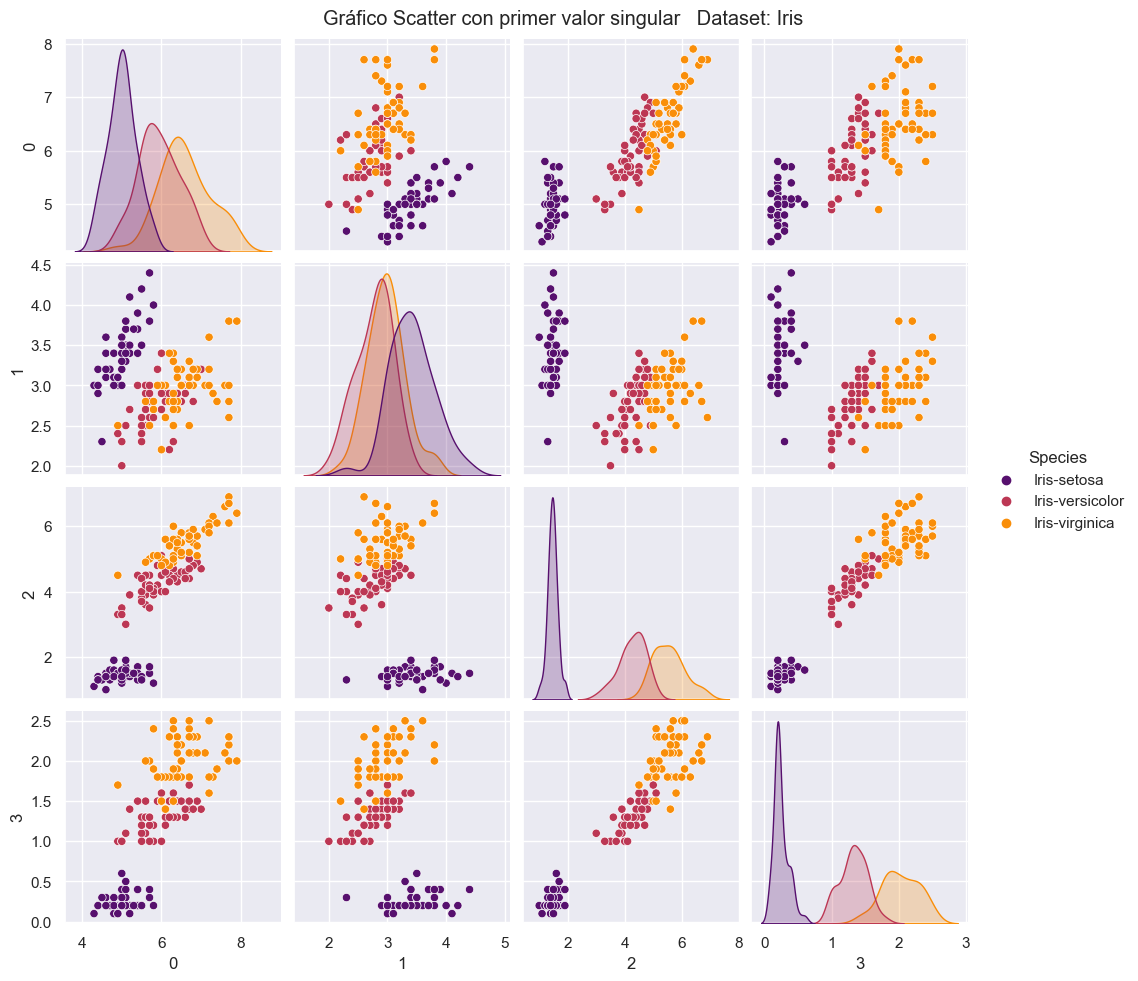

In [82]:


plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(pd.concat([pd.DataFrame(Xapprox),iris.Species],axis=1),hue="Species",palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter con primer valor singular   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

Si comparamos el scatter original vemos que es exactamente el mismo, esto por que estamos usando el 100% de los componentes, es decir el rango completo de la matriz de eigenvalores

# Error y CO para r = 4

In [105]:
# en nuestro Caso con R = 4 tenemos que el total de singularidades esta dado por s
r=4
CO = r / len(np.diag(S))

print(f" el compression Ratio para r = 4 es : {CO}")

 el compression Ratio para r = 4 es : 1.0


In [106]:
absolute_percentage_errors = np.abs((np.array(num_data) - np.array(Xapprox)) / np.array(num_data))

mape_value = np.mean(absolute_percentage_errors) * 100

print(f" el MAPE para r = 4 es : {np.round(mape_value,2)}")

 el MAPE para r = 4 es : 0.0


Finalmente a tema de comprobación validamosa que nuestra compresión es de 0, pues estamos usando todos los eigenvalroes y que el error para este caso ya es de 0

##  <font color="#008080">Discusión</font>


La Descomposición en Valores Singulares (SVD) es una técnica poderosa en el ámbito de la álgebra lineal y el análisis de datos que encuentra aplicaciones en diversas disciplinas, incluyendo la ciencia de datos y la reducción de dimensionalidad. Al aplicar SVD al conjunto de datos Iris, hemos desglosado la matriz de características en tres componentes fundamentales: las matrices de vectores singulares izquierdos y derechos, y la matriz diagonal de valores singulares.

Identificación de Patrones Latentes:

La SVD nos permite identificar patrones latentes en los datos. Al examinar los vectores singulares izquierdos y derechos, podemos entender cómo las características originales contribuyen a la variabilidad en los datos. Esto puede ser crucial para descubrir relaciones subyacentes entre las características y para comprender la estructura interna del conjunto de datos Iris.
Reducción de Dimensionalidad:

Al retener solo un subconjunto de los valores singulares, podemos lograr una reducción de dimensionalidad. Esto es valioso para visualizar datos en un espacio de menor dimensión, facilitando la interpretación y la identificación de tendencias. Podemos visualizar cómo la información se distribuye en un espacio de menor dimensión, lo cual puede ser especialmente útil en conjuntos de datos con muchas características.
Compresión de Datos:

La SVD también tiene aplicaciones en la compresión de datos. Al conservar solo los primeros  k valores singulares más grandes, donde k es menor que el rango original de la matriz, podemos aproximar la matriz original con una precisión aceptable. Esto puede ser beneficioso en términos de almacenamiento y procesamiento eficiente de grandes conjuntos de datos.
Relevancia en la Clasificación de Iris:

En el contexto específico del conjunto de datos Iris, la SVD podría proporcionar una perspectiva única sobre cómo las características contribuyen a la clasificación de las especies. Al observar cómo los vectores singulares izquierdos y derechos están relacionados con las especies de Iris, podríamos inferir la importancia de ciertas características en la diferenciación entre especies.
Consideraciones sobre la Elección de k:

La elección del número de valores singulares a retener (k) es crucial y debe basarse en objetivos específicos. Un k demasiado pequeño puede resultar en una pérdida significativa de información, mientras que un k demasiado grande puede no brindar ventajas significativas en términos de reducción de dimensionalidad.
Perspectivas Futuras:

La SVD proporciona una base sólida para futuras investigaciones y análisis avanzados. Puede ser valioso explorar cómo los conceptos derivados de la SVD podrían integrarse en modelos de aprendizaje automático para mejorar la precisión predictiva o cómo los patrones latentes identificados podrían tener implicaciones biológicas en el contexto de las especies de Iris.
En resumen, la aplicación de la SVD al conjunto de datos Iris proporciona una visión profunda y estructurada de la variabilidad de las características. Esto no solo mejora nuestra comprensión de los datos, sino que también allana el camino para aplicaciones más avanzadas en el análisis y la interpretación de conjuntos de datos multidimensionales.

##  <font color="#008080">Conclusión</font>

En este trabajo, hemos aplicado la Descomposición en Valores Singulares (SVD) al conjunto de datos Iris, explorando sus implicaciones en la identificación de patrones, reducción de dimensionalidad y compresión de datos. La SVD ha demostrado ser una herramienta poderosa para descomponer la matriz de características en componentes significativos, permitiéndonos discernir patrones latentes y comprender mejor la estructura interna del conjunto de datos.

* Identificación de Patrones:  

La SVD ha proporcionado una perspectiva única sobre cómo las características contribuyen a la variabilidad en el conjunto de datos Iris. Los vectores singulares izquierdos y derechos revelan cómo las características originales interactúan y contribuyen a la formación de patrones distintivos.

* Reducción de Dimensionalidad y Compresión de Datos:

Al retener un número reducido de valores singulares, hemos logrado una reducción de dimensionalidad efectiva. Esto no solo facilita la visualización de datos, sino que también sugiere la posibilidad de compresión de datos, lo cual es crucial para la eficiencia en el almacenamiento y procesamiento de grandes conjuntos de datos.

* Aplicabilidad a la Clasificación de Iris:

La SVD ha ofrecido una perspectiva valiosa sobre cómo las características están relacionadas con la clasificación de las especies de Iris. La interpretación de los vectores singulares puede proporcionar insights sobre qué características son más determinantes en la diferenciación entre especies.

* Consideraciones sobre k:

La elección del número de valores singulares a retener (k) es un factor crítico. Se debe considerar cuidadosamente para equilibrar la reducción de dimensionalidad con la preservación de información esencial. Este parámetro tiene un impacto directo en la calidad de la aproximación de la matriz original.  

La SVD establece una base sólida para investigación y el análisis de datps. Puede ser beneficioso explorar cómo los conceptos derivados de la SVD pueden integrarse en modelos de aprendizaje automático para mejorar la capacidad predictiva o cómo los patrones latentes identificados podrían tener implicaciones prácticas  más profundas.
En resumen, la aplicación de la SVD en el conjunto de datos Iris ha enriquecido nuestra comprensión de la estructura de datos multidimensionales, proporcionando herramientas valiosas para la exploración, interpretación y análisis avanzado. La SVD emerge como una herramienta esencial para la extracción de conocimientos en conjuntos de datos complejos, allanando el camino para investigaciones más profundas y aplicaciones prácticas.

##  <font color="#008080">Referencias</font>

* Anderson, E. R., & Fisher, R. A. (1936). Iris Dataset. Kaggle. https://www.kaggle.com/uciml/iris
Applied multivariable data statistical analysis
* Barroco E.E, (2024), Applied multivariable data statistical analysis. Maestría en ciencia de los datos